In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter



# SECTION 2  - DATA SUMMARY 

## Introducing Data Source ##

#### Malicious Website Analysis

* URL: it is the anonimous identification of the URL analyzed in the study
* URL_LENGTH: it is the number of characters in the URL
* NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
* CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
* SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
* CONTENT_LENGTH: it represents the content size of the HTTP header.
* WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
* WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
* WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
* WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
* TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
* DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
* REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
* APP_BYTES: this is the number of bytes transfered
* SOURCE_APP_PACKETS: packets sent from the honeypot to the server
* REMOTE_APP_PACKETS: packets received from the server
* APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
* DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
* TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites


In [2]:
# Fetching our data source 
raw = pd.read_csv("./dataset.csv")
raw

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0



## Data Variables & Definitions

### Six Numerical & Categorical Variables 

__TYPE__: this is a categorical variable, its values represent the type of web page analyzed, specifically, 
1 is for malicious websites and 0 is for benign websites.

__URL_LENGTH__: it is the number of characters in the URL.

__CHARSET__: it is a categorical value and its meaning is the character encoding standard (also called character set).

__CONTENT_LENGTH__: it represents the content size of the HTTP header.

__APP_BYTES__: this is the number of bytes transfered

__SOURCE_APP_PACKETS__: packets sent from the honeypot to the server.

__REMOTE_APP_PACKETS__: packets received from the server.

In [3]:
# Reconstructing the raw dataset according to our question so we eliminate extra columns data we dont need to use.
df = pd.DataFrame(
    [ 
        raw.Type,
        raw.URL_LENGTH, 
        raw.CHARSET,
        raw.CONTENT_LENGTH,
        raw.APP_BYTES,
        raw.SOURCE_APP_PACKETS,
        raw.REMOTE_APP_PACKETS
    ]
).T

data = df.dropna()
data


,Type,URL_LENGTH,CHARSET,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS
0,1,16,iso-8859-1,263,700,9,10
1,0,16,UTF-8,15087,1230,17,19
2,0,16,us-ascii,324,0,0,0
3,0,17,ISO-8859-1,162,3812,39,37
4,0,17,UTF-8,124140,4278,61,62
...,...,...,...,...,...,...,...
1768,0,160,UTF-8,36829,2402,25,22
1769,0,161,iso-8859-1,417,582,7,11
1774,0,183,ISO-8859-1,4890,2062,30,26
1778,0,201,utf-8,8904,6631,87,89


## Statistical Summary 


1) Mean

2) Sum

3) Unique

4) Top

5) Frecuency

6) Min

7) Max

8) Standart Dev

##### General look to the statistical table.
##### Next we are going to consturct a more detail table since we dont much of the statistical variables on the table.


In [4]:
# The statistical table.

generalTable = data.describe(include='all').transpose()
newTable = pd.DataFrame([
                        data.mean(),
                        data.median(),
                        data.std(),
                        data.min(),
                        data.max()
    ], index=["Mean", "Median", "Std", "Min", "Max"])


### Statistical Summary 

In [5]:
generalTable

,count,unique,top,freq
Type,969,2,0,863
URL_LENGTH,969,123,40,31
CHARSET,969,8,UTF-8,289
CONTENT_LENGTH,969,637,324,138
APP_BYTES,969,507,0,327
SOURCE_APP_PACKETS,969,94,0,327
REMOTE_APP_PACKETS,969,99,0,324


In [6]:
newTable.fillna("-")

,Type,URL_LENGTH,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,CHARSET
Mean,0.109391,55.618163,11726.927761,1718.202270,19.332301,19.351909,-
Median,0.000000,49.000000,1853.000000,762.000000,10.000000,10.000000,-
Std,0.312290,25.589874,36391.809051,3922.080923,46.027671,49.988997,-
Min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,ISO-8859
Max,1.000000,249.000000,649263.000000,99843.000000,1198.000000,1284.000000,windows-1251


## Categorizing & Plotting

1) ***_Charset vs Url lenght_***

2) ***_Malicious vs Bening Avg data comperison_***

Text(0.5, 0.98, 'Categorical Plotting CHARSET vs URL_LENGTH')

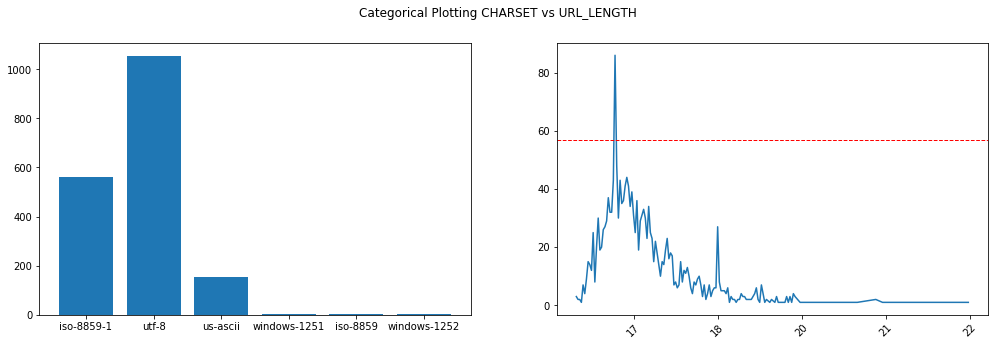

In [7]:
ch = raw.CHARSET.str.lower()

x = list(filter(lambda x: x.lower() != "nan" and x !=  "none", ch))
Charset_list=[ k.lower() for k,v in Counter(x).items() if v > 1]
Charset_list = list(dict.fromkeys(Charset_list))
Charset_list

y = list(filter(lambda x: x != "nan" and x != "None", raw.URL_LENGTH))
URLLength_list=[k for k,v in Counter(y).items() if v > 1]
URLLength_list = list(dict.fromkeys(URLLength_list))



data = dict(Counter(x))
names = list(data.keys())
values = list(data.values())

data1 = dict(Counter(y))
names1 = list(data1.keys())
values1 = list(data1.values())

fig, axs = plt.subplots(1,2 ,figsize=(17, 5))

axs[0].bar(names, values)
axs[0].set_xticklabels(names, fontdict=None , minor=True,)

axs[1].plot(names1, values1)
axs[1].axhline(raw.URL_LENGTH.mean(), color='red', linestyle='dashed', linewidth=1, label="Average Length")
axs[1].set_xticklabels(URLLength_list, fontdict=None,  rotation=45)

fig.suptitle('Categorical Plotting CHARSET vs URL_LENGTH')


In [8]:
class AggregateFunctions:
    def __init__(self, data=None):
        self.data = data
    
    def isEmpty(self):
        return self.data.empty

    def getMean(self, c:str)-> str:
        if (self.isEmpty() == False):
            return(self.data[c].mean( skipna=True))
            
    def getMedian(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].median( skipna=True))
            
    def getMin(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].min( skipna=True))
            
    def getMax(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].max( skipna=True))

# comparing the remote/source app transfer packages vs content length on Malicious
def compare(N):
    Sites = raw.loc[raw['Type'] == N]
    ds = AggregateFunctions(Sites)

    mean = ds.getMean("CONTENT_LENGTH")
    median = ds.getMedian("CONTENT_LENGTH")
    Max = ds.getMax("CONTENT_LENGTH")
    Min = ds.getMin("CONTENT_LENGTH")

    mean2 = ds.getMean("REMOTE_APP_PACKETS")
    median2 = ds.getMedian("REMOTE_APP_PACKETS")
    Max2 = ds.getMax("REMOTE_APP_PACKETS")
    Min2 = ds.getMin("REMOTE_APP_PACKETS")

    mean3 = ds.getMean("SOURCE_APP_PACKETS")
    median3 = ds.getMedian("SOURCE_APP_PACKETS")
    Max3 = ds.getMax("SOURCE_APP_PACKETS")
    Min3 = ds.getMin("SOURCE_APP_PACKETS")

    data= {"Mean":[mean, mean2, mean3], "Median": [median, median2, median3], "Max":[Max, Max2, Max3], "Min":[Min, Min2, Min3]}
    df = pd.DataFrame(data, index=["CONTENT_LENGTH","REMOTE_APP_PACKETS","SOURCE_APP_PACKETS"])
    return df



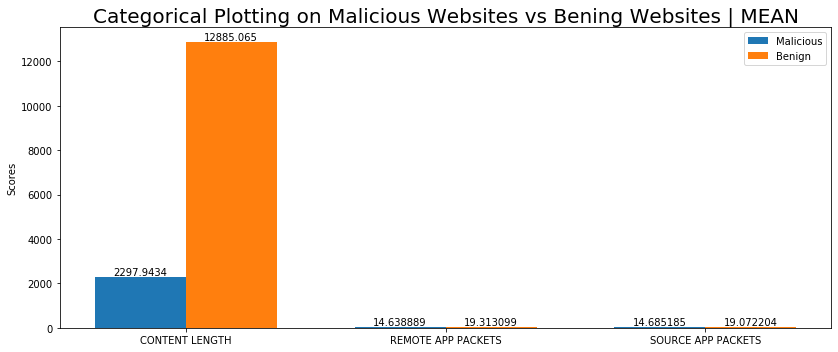

In [9]:
from decimal import *
getcontext()
Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999999, Emax=999999999,
        capitals=1, flags=[], traps=[Overflow, DivisionByZero,
        InvalidOperation])

getcontext().prec = 8

labels = ["Malicious", "Benign",""]

m = [Decimal(compare(1).loc["CONTENT_LENGTH", "Mean"]), 
     Decimal(compare(1).loc["REMOTE_APP_PACKETS", "Mean"]),
     Decimal(compare(1).loc["SOURCE_APP_PACKETS", "Mean"])]

b = [Decimal(compare(0).loc["CONTENT_LENGTH", "Mean"]), 
     Decimal(compare(0).loc["REMOTE_APP_PACKETS", "Mean"]),
     Decimal(compare(0).loc["SOURCE_APP_PACKETS", "Mean"])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots( figsize=(12,5))
rects1 = ax.bar(x - width/2, m, width, label=labels[0])
rects2 = ax.bar(x + width/2, b, width, label=labels[1])



ax.set_ylabel('Scores')
ax.set_title('Categorical Plotting on Malicious Websites vs Bening Websites | MEAN', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["CONTENT LENGTH","REMOTE APP PACKETS", "SOURCE APP PACKETS" ])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

# SECTION 3 - Methdology / Results #


## Introduce the background of the model
I will formulate Malicious URL detection as a binary classification task for two-class prediction:
“malicious" vs “benign". 

Specifically, given a data set withT URLs {(u1,y1), . . . ,(uT ,yT )}, where
ut for t = 1, . . . ,T represents a URL from the training data, and yt ∈ {1, −1}(**__Pandas.reshape(1,-1)__**) is the corresponding
label where yt = 1 represents a malicious URL and yt = −1 represents a benign URL.

There is a rich family of machine learning algorithms in literature, which can be applied for solving malicious URL detection. After converting URLs into feature vectors, many of these learning
algorithms can be generally applied to train a predictive model in a fairly straightforward manner.

However, to effectively solve the problem, some efforts have also been explored in devising specific
learning algorithms that either exploit the properties exhibited by the training data of Malicious
URLs, or address some specific challenges which the application faces. I will categorize some learning algorithms that can be suitable for our research question.


#### Decision Trees
Decision trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
Decision tree also is one of most popular methods for inductive inference and has a major
advantage of its highly interpretable decision tree classification models which can also been
converted into a rule set for human readability. Decision Trees have been used for malicious
URL/web classification. A closely related approach
which gives us rules in the form of If-then was applied in using Associative Classification mining.

#### Logistic Regression. 
Logistic regression is one of the well-known discriminative model which computes the conditional probability for a feature vector x to be classified as a class y = 1.
Based on the maximum-likelihood estimation (equivalently defining the loss function as the negative
log likelihood)where the regularization term can be either L2-norm R(w) = ||w||2 or L1-norm R(w) = ||w||1
for achieving a sparse model for high-dimensional data. Logistic Regression has been a popular
learning method for Malicious URL Detection.

\begin{align}\begin{aligned}\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p n\end{split}\end{aligned}\end{align}


#### Support Vector Machine
(SVM) is one of most popular supervised learning methods. It exploits the structural risk minimization principle using a maximum margin learning approach, which essentially can be viewed as a special instance of the regularized loss minimization framework. Specifically, by choosing the hinge loss as the loss function and maximizing the margin.

\begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}



## Introduce the specific variables 
Regarding to the research my question, I should be targeting the boolean variable which is ["TYPE"] variable since **i am trying to detecting and analyisis of a malicious web site**. In early implementation i have tried applying simple linear regression model however it was not the best approach eventhough it is one of the most popular approach in the cybersecurity field. The reason behind this, my data set already have TYPE variable which mean it s already been seperated/categorized by the **types (Malicious vs Bening) by apply one of methods above**. Furthermore i can use this data set and run one more model and try to predict based on the behaivor of the TYPE.






#### Creating our classification with Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree


X = raw[["URL_LENGTH","SOURCE_APP_PACKETS","REMOTE_APP_PACKETS"]][:100]
y = raw.Type[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)




#### Printing our accuracy rate

In [121]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


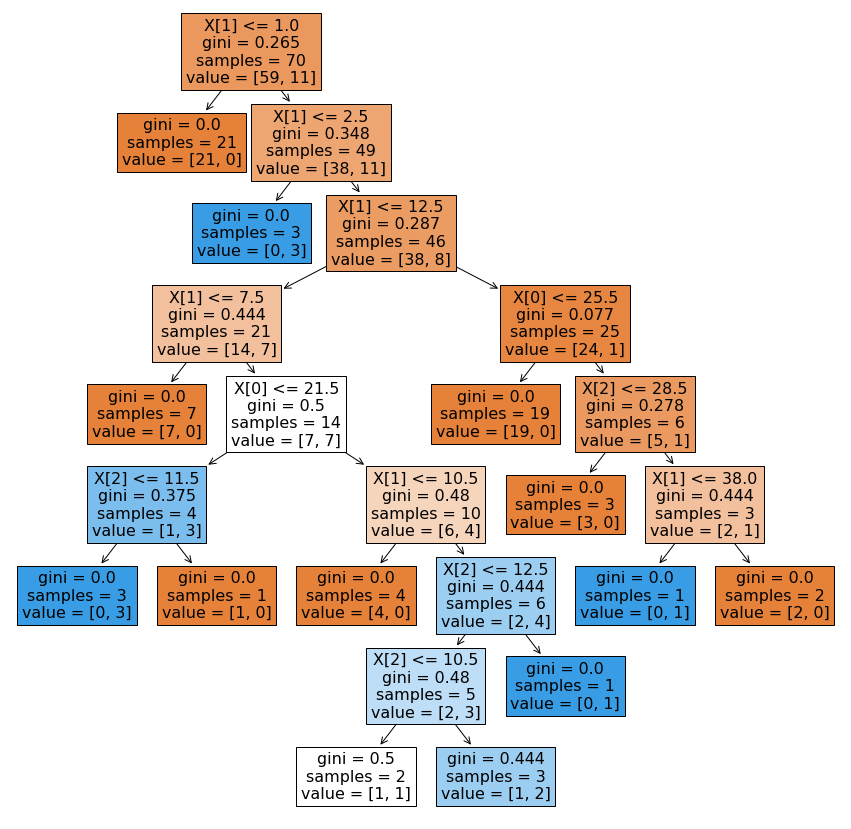

In [118]:
fig, axs = plt.subplots(figsize=(15, 15))
clf = DecisionTreeClassifier().fit(X_train,y_train)
tree.plot_tree(clf, filled=True)

plt.show()

#### Optimizing Decision Tree Performance

In [122]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



#### Printing our accuracy rate

In [123]:
# Model Accuracy, how often is the classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


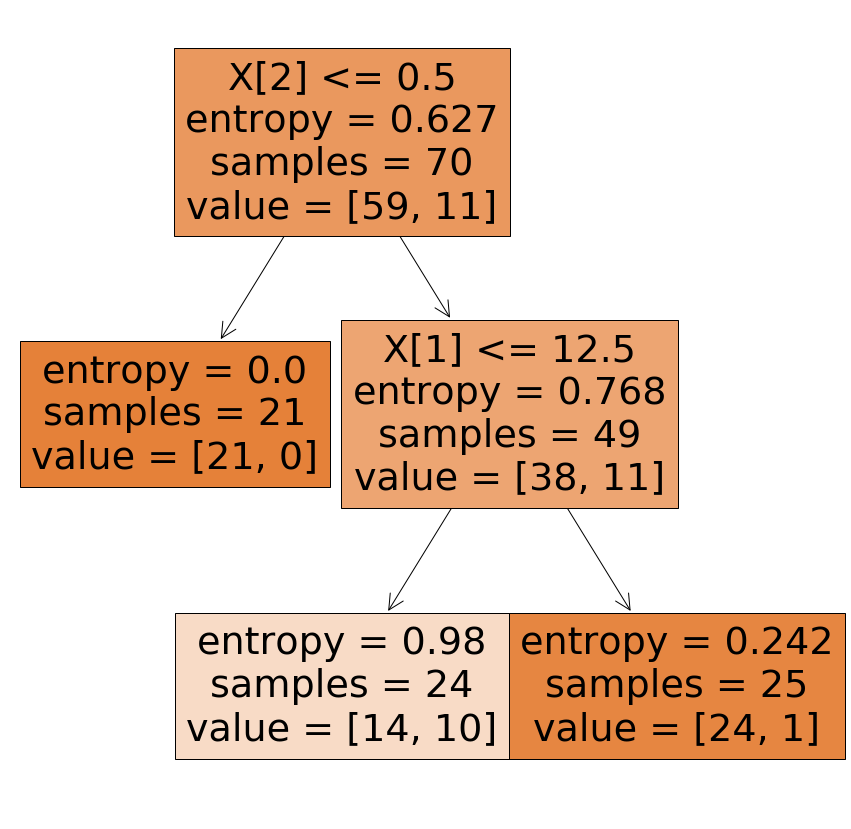

In [125]:
fig, axs = plt.subplots(figsize=(15, 15))
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train,y_train)
tree.plot_tree(clf, filled=True)

plt.show()

TypeError: predict() missing 1 required positional argument: 'X'